In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('student_info.csv')
data.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [3]:
data.shape

(200, 2)

In [4]:
data.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

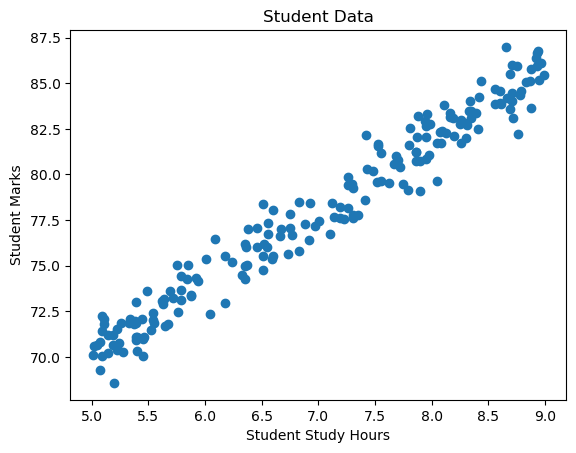

In [5]:
plt.scatter(x = data.study_hours , y=data.student_marks)
plt.title("Student Data")
plt.xlabel("Student Study Hours")
plt.ylabel("Student Marks")
plt.show()

In [6]:
data.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [7]:
data = data.fillna(data.mean())
data.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [8]:
X = data.drop(columns = 'student_marks')
y = data.drop(columns = 'study_hours')
X.shape , y.shape

((200, 1), (200, 1))

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X, y , random_state=51 , test_size=0.2)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((160, 1), (160, 1), (40, 1), (40, 1))

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()
lr.fit(X_train , y_train)

LinearRegression()

In [13]:
lr.score(X_test , y_test)

0.9514124242154464

In [14]:
lr.intercept_

array([50.44735504])

In [15]:
pred = lr.predict(X_test)
pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [16]:
y_test

,student_marks
148,82.02
104,77.55
4,84.19
7,85.46
192,84.03
160,80.81
118,73.61
58,70.90
190,73.14
174,73.02


In [17]:
pd.DataFrame(np.c_[X_test , y_test , pred] ,columns =[ 'Study hours' , 'Original Marks' , 'Predicted Marks'])

,Study hours,Original Marks,Predicted Marks
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [18]:
# Fine Tune Model
lr.score(X_test,y_test)

0.9514124242154464

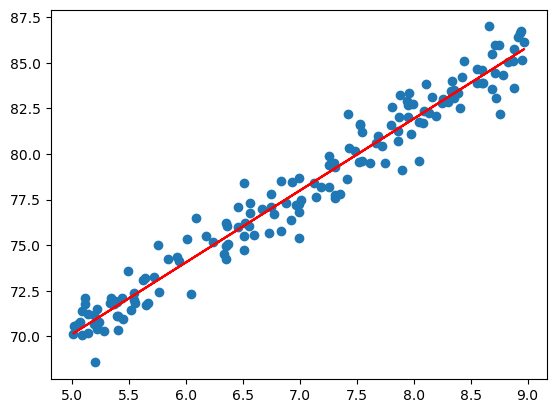

In [19]:
plt.scatter(X_train, y_train)
plt.plot(X_train ,lr.predict(X_train) , color='r')

In [20]:
import joblib

In [21]:
joblib.dump(lr , 'Student_Marks_Prediction_Model.pkl')

['Student_Marks_Prediction_Model.pkl']

In [25]:
model = joblib.load('Student_Marks_Prediction_Model.pkl')

In [26]:
model.predict([[ 1 ]])[0][0]

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


54.38307305359076

In [27]:
data.describe()

,study_hours,student_marks
count,200.000000,200.00000
mean,6.995949,77.93375
std,1.237218,4.92570
min,5.010000,68.57000
25%,5.790000,73.38500
50%,7.002974,77.71000
75%,8.072500,82.32000
max,8.990000,86.99000
